In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

In [2]:
g = LoadConnectome2() # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")

SparkMeta = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv") # Load Bias
SparkMeta.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMeta = SparkMeta.set_index("STR")
SparkMeta.head(2)

,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.466543,1,147
Field_CA1,0.448538,2,147


In [3]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
adj_mat_local, adj_mat_distal = LocalDistal_Region()
g_local_region = LoadConnectome2(ConnFil=adj_mat_local)
g_distal_region = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local_region = EdgeDict(g_local_region, keyon="label")
EdgeWeightsDict_distal_region = EdgeDict(g_distal_region, keyon="label")

# 0. Circuit STRs

## 1. 50 Candidate STR cohesivneness for ASD and Matched

###### 1.1 Binary 

In [88]:
# ASD
Weighted, Directed = False, False
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

Total    0.368
Local    0.517
Distal   0.302


In [89]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Sib_Complete, Sib_Local, Sib_Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Sib_Complete))
print("Local  % .3f"% np.mean(Sib_Local))
print("Distal % .3f"% np.mean(Sib_Distal))

Total   0.271
Local   0.339
Distal  0.247


In [90]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Mat_Complete, Mat_Local, Mat_Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Mat_Complete))
print("Local  % .3f"% np.mean(Mat_Local))
print("Distal % .3f"% np.mean(Mat_Distal))

Total   0.317
Local   0.409
Distal  0.269


In [93]:
print("vs. Sib", mannwhitneyu(complete_cohes, Sib_Complete))
print("vs. Mat", mannwhitneyu(complete_cohes, Mat_Complete))

vs. Sib MannwhitneyuResult(statistic=13078.0, pvalue=6.101877774337418e-09)
vs. Mat MannwhitneyuResult(statistic=19364.0, pvalue=0.003540588992347078)


###### 1.2 Binary & Directed 

In [7]:
# ASD
Weighted, Directed = False, True
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

Total    0.485
Local    0.588
Distal   0.438


In [8]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.366
Local   0.407
Distal  0.350


In [9]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.411
Local   0.486
Distal  0.369


###### 1.3 Weighted 

In [10]:
# ASD
Weighted, Directed = True, False
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

Total    0.378
Local    0.522
Distal   0.310


In [11]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.275
Local   0.340
Distal  0.251


In [12]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.323
Local   0.411
Distal  0.274


###### 1.4 Weighted & Directed 

In [13]:
# ASD
Weighted, Directed = True, True
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

Total    0.492
Local    0.590
Distal   0.446


In [14]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.368
Local   0.409
Distal  0.353


In [15]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.413
Local   0.489
Distal  0.372


## 2. SA circuit cohesivneness for ASD and Matched

###### 2.1 Binary 

In [95]:
# ASD
SA_ = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
Weighted = False; Directed = False
Incircuit_ = GetBestCoheSAFil(SA_, Weighted, Directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
asd_scores_total = ScoreSTRSet(g, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
asd_scores_local = ScoreSTRSet(g_local_region, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
asd_scores_distal = ScoreSTRSet(g_distal_region, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.382
Local      0.432
Distal     0.310


In [96]:
Incircuit_

array(['Orbital_area_lateral_part', 'Prelimbic_area',
       'Orbital_area_ventrolateral_part', 'Dorsal_peduncular_area',
       'Infralimbic_area', 'Nucleus_accumbens',
       'Anterior_olfactory_nucleus', 'Accessory_olfactory_bulb',
       'Lateral_posterior_nucleus_of_the_thalamus',
       'Endopiriform_nucleus_dorsal_part', 'Claustrum',
       'Primary_visual_area', 'Subiculum_dorsal_part',
       'Agranular_insular_area_ventral_part', 'Anteromedial_visual_area',
       'Primary_somatosensory_area_lower_limb', 'Primary_motor_area',
       'Anterior_cingulate_area_dorsal_part', 'Gustatory_areas',
       'Nucleus_of_reuniens', 'Parafascicular_nucleus',
       'Secondary_motor_area',
       'Retrosplenial_area_lateral_agranular_part', 'Caudoputamen',
       'Orbital_area_medial_part', 'Frontal_pole_cerebral_cortex',
       'Visceral_area', 'Basolateral_amygdalar_nucleus',
       'Agranular_insular_area_posterior_part',
       'Submedial_nucleus_of_the_thalamus',
       'Anterior_cingu

In [82]:
# Sibling SubSamples
Sib_Complete, Sib_Local, Sib_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/sib.cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    Sib_Complete.extend(complete)
    Sib_Local.extend(local)
    Sib_Distal.extend(distal)
print("Total  % .3f"% np.mean(Sib_Complete))
print("Local  % .3f"% np.mean(Sib_Local))
print("Distal % .3f"% np.mean(Sib_Distal))

Total   0.315
Local   0.382
Distal  0.279


In [83]:
mannwhitneyu(asd_scores_total, Sib_Complete)

MannwhitneyuResult(statistic=356423.0, pvalue=0.00030257476023456145)

In [85]:
# Sibling SubSamples
Mat_Complete, Mat_Local, Mat_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    Mat_Complete.extend(complete)
    Mat_Local.extend(local)
    Mat_Distal.extend(distal)
print("Total  % .3f"% np.mean(Mat_Complete))
print("Local  % .3f"% np.mean(Mat_Local))
print("Distal % .3f"% np.mean(Mat_Distal))

Total   0.362
Local   0.472
Distal  0.293


In [86]:
mannwhitneyu(asd_scores_total, Mat_Complete)

MannwhitneyuResult(statistic=517760.5, pvalue=0.13445152875943156)

###### 2.2 Binary & Directed 

In [165]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.D.csv")
Weighted = False; Direction = True
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

CandidateSTRs = meta_jon.head(50).index.values
asd_scores_total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
asd_scores_local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
asd_scores_distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.521
Local      0.571
Distal     0.465


In [166]:
Complete, Local, Distal = [], [], []
All_Complete, All_Local, All_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
    All_Complete.extend(complete)
    All_Local.extend(local)
    All_Distal.extend(distal)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.489
Local   0.569
Distal  0.396


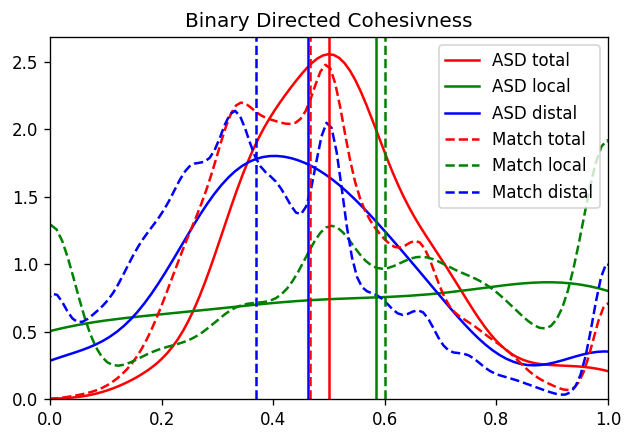

In [167]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=asd_scores_total, hist=False, label="ASD total", color=colors[0])
sns.distplot(a=asd_scores_local, hist=False, label="ASD local", color=colors[1])
sns.distplot(a=asd_scores_distal, hist=False, label="ASD distal", color=colors[2])
sns.distplot(a=All_Complete, hist=False, label="Match total", color=colors[0], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Local, hist=False, label="Match local", color=colors[1], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Distal, hist=False, label="Match distal", color=colors[2], kde_kws={'linestyle':'--'})

plt.axvline(x=np.median(asd_scores_total), c=colors[0])
plt.axvline(x=np.median(asd_scores_local), c=colors[1])
plt.axvline(x=np.median(asd_scores_distal), c=colors[2])
plt.axvline(x=np.median(All_Complete), linestyle="--", c=colors[0])
plt.axvline(x=np.median(All_Local), linestyle="--", c=colors[1])
plt.axvline(x=np.median(All_Distal), linestyle="--", c=colors[2])

plt.title("Binary Directed Cohesivness")
plt.xlim((0,1))
plt.show()

###### 2.3 Weighted 

In [168]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.W.csv")
Weighted = True; Direction = False
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

CandidateSTRs = meta_jon.head(50).index.values
asd_scores_total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
asd_scores_local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
asd_scores_distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.399
Local      0.510
Distal     0.309


In [169]:
Complete, Local, Distal = [], [], []
All_Complete, All_Local, All_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
    All_Complete.extend(complete)
    All_Local.extend(local)
    All_Distal.extend(distal)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.375
Local   0.483
Distal  0.298


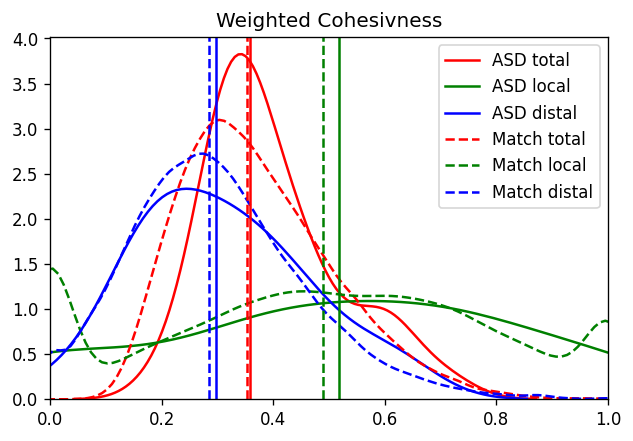

In [170]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=asd_scores_total, hist=False, label="ASD total", color=colors[0])
sns.distplot(a=asd_scores_local, hist=False, label="ASD local", color=colors[1])
sns.distplot(a=asd_scores_distal, hist=False, label="ASD distal", color=colors[2])
sns.distplot(a=All_Complete, hist=False, label="Match total", color=colors[0], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Local, hist=False, label="Match local", color=colors[1], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Distal, hist=False, label="Match distal", color=colors[2], kde_kws={'linestyle':'--'})

plt.axvline(x=np.median(asd_scores_total), c=colors[0])
plt.axvline(x=np.median(asd_scores_local), c=colors[1])
plt.axvline(x=np.median(asd_scores_distal), c=colors[2])
plt.axvline(x=np.median(All_Complete), linestyle="--", c=colors[0])
plt.axvline(x=np.median(All_Local), linestyle="--", c=colors[1])
plt.axvline(x=np.median(All_Distal), linestyle="--", c=colors[2])

plt.title("Weighted Cohesivness")
plt.xlim((0,1))
plt.show()

###### 2.4 Weighted & Directed 

In [171]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.WD.csv")
Weighted = True; Direction = True
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

CandidateSTRs = meta_jon.head(50).index.values
asd_scores_total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
asd_scores_local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
asd_scores_distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.536
Local      0.568
Distal     0.492


In [172]:
Complete, Local, Distal = [], [], []
All_Complete, All_Local, All_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir.wd/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
    All_Complete.extend(complete)
    All_Local.extend(local)
    All_Distal.extend(distal)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.496
Local   0.573
Distal  0.406


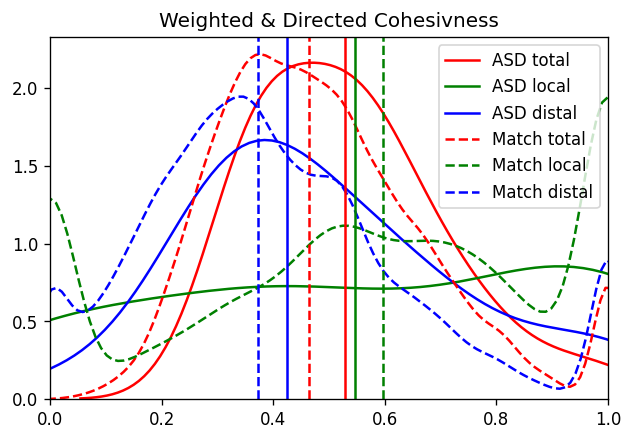

In [173]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=asd_scores_total, hist=False, label="ASD total", color=colors[0])
sns.distplot(a=asd_scores_local, hist=False, label="ASD local", color=colors[1])
sns.distplot(a=asd_scores_distal, hist=False, label="ASD distal", color=colors[2])
sns.distplot(a=All_Complete, hist=False, label="Match total", color=colors[0], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Local, hist=False, label="Match local", color=colors[1], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Distal, hist=False, label="Match distal", color=colors[2], kde_kws={'linestyle':'--'})

plt.axvline(x=np.median(asd_scores_total), c=colors[0])
plt.axvline(x=np.median(asd_scores_local), c=colors[1])
plt.axvline(x=np.median(asd_scores_distal), c=colors[2])
plt.axvline(x=np.median(All_Complete), linestyle="--", c=colors[0])
plt.axvline(x=np.median(All_Local), linestyle="--", c=colors[1])
plt.axvline(x=np.median(All_Distal), linestyle="--", c=colors[2])

plt.title("Weighted & Directed Cohesivness")
plt.xlim((0,1))
plt.show()

## 3.

In [175]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv")
Weighted = False; Direction = False
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

In [53]:
CircuitCandidates = []
for i, (k, v) in enumerate(res.items()):
    InCirtuitNodes = k.split(",")
    CircuitCandidates.append(InCirtuitNodes)
    score = np.mean(ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction))
    print("%d   Cohe: %.3f %d" % (i, score, v))

0   Cohe: 0.400 70
1   Cohe: 0.395 10
2   Cohe: 0.399 13
3   Cohe: 0.405 3
4   Cohe: 0.407 2
5   Cohe: 0.403 2


In [45]:
CircuitCandidates = []
for k, v in res.items():
    #print(k)
    InCirtuitNodes = k.split(",")
    print(np.mean(ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)))
    print(v)

0.5534149459722119
41
0.5433615466728854
20
0.5376593762052718
26
0.5269524874464796
13


## 4. Other Def of Distance

### 4.1 Cartesian 

##### 4.1.0 preprocessing

In [20]:
Cartesian_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)

In [22]:
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if Mat1.loc[STR_i, STR_j] <= cutoff:
                New_Mat2.loc[STR_i, STR_j] = 0
            else:
                New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

In [23]:
Cartesian_distances_w_edge = MaskDistMat(adj_mat, Cartesian_distances, cutoff=0)

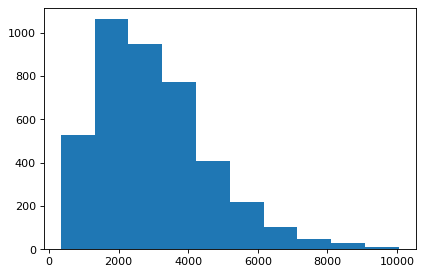

In [24]:
Cartesian_distances = [x for x in Cartesian_distances_w_edge.values.flatten() if x > 0]
Cartesian_distances_deciles = np.percentile(Cartesian_distances, np.arange(0, 100, 10))
plt.hist(Cartesian_distances)
plt.show()

In [25]:
Cartesian_distances_deciles
print([round(x, 2) for x in Cartesian_distances_deciles])

[333.54, 1186.04, 1563.65, 1971.99, 2342.11, 2750.74, 3183.41, 3649.83, 4199.02, 5153.08]


In [26]:
def MaskDistMat_xx(distance_mat, Conn_mat, cutoff):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if distance_mat.loc[STR_i, STR_j] >= cutoff:
                Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
            else:
                Conn_mat_new.loc[STR_i, STR_j] = 0
                distance_mat_new.loc[STR_i, STR_j] = 0
    return Conn_mat_new, distance_mat_new
for i in range(10):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, 
                                                cutoff=Cartesian_distances_deciles[i])
    print(Cartesian_distances_deciles[i])
    print(np.min(distance_mat_new.values), np.max(distance_mat_new.values))
    distance_mat_new.to_csv("../dat/allen-mouse-conn/cartesian_deciles_limit_{}.csv".format(i))

333.54160160315837
0.0 10053.917147062632
1186.0385682682947
0.0 10053.917147062632
1563.6492706664203
0.0 10053.917147062632
1971.991379291502
0.0 10053.917147062632
2342.1144287057114
0.0 10053.917147062632
2750.738536606747
0.0 10053.917147062632
3183.414045662987
0.0 10053.917147062632
3649.8287631065655
0.0 10053.917147062632
4199.017732151627
0.0 10053.917147062632
5153.081367367425
0.0 10053.917147062632


In [27]:
graph_mats_cartesians = []
for i in range(10):
    xx = pd.read_csv("../dat/allen-mouse-conn/cartesian_deciles_limit_{}.csv".format(i), index_col=0)
    g_ = LoadConnectome2(xx)
    graph_mats_cartesians.append(g_)

##### 4.1.1 Unweighted, Undirected

In [55]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
weighted = False; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)

In [56]:
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [57]:
Match_Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Match_Cartesian_match_scores_deciles.append(avg)

In [58]:
Sib_Cartesian_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/sib.cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Sib_Cartesian_scores_deciles.append(avg)

In [59]:
print(Cartesian_asd_scores_deciles)
print(Match_Cartesian_match_scores_deciles)
print(Sib_Cartesian_scores_deciles)

[0.37984302573438183, 0.35127103956178707, 0.32345555495212996, 0.315114670633903, 0.31214017419538487, 0.3207874127572525, 0.3189318330810199, 0.31535787609481614, 0.2859937732755193, 0.2614100020350021]
[0.36415218426412843, 0.33613536978073283, 0.31516339015255135, 0.293755632628427, 0.2698452097904861, 0.24609197292437648, 0.22259366639571473, 0.19916927847012214, 0.1741424231664572, 0.12193484241883384]
[0.3169615404276532, 0.2948178120973314, 0.2814146275227652, 0.26798747209933094, 0.25295606083163286, 0.23585719855137782, 0.20987986971289233, 0.1914123784299706, 0.1612269158216472, 0.09701907424240051]


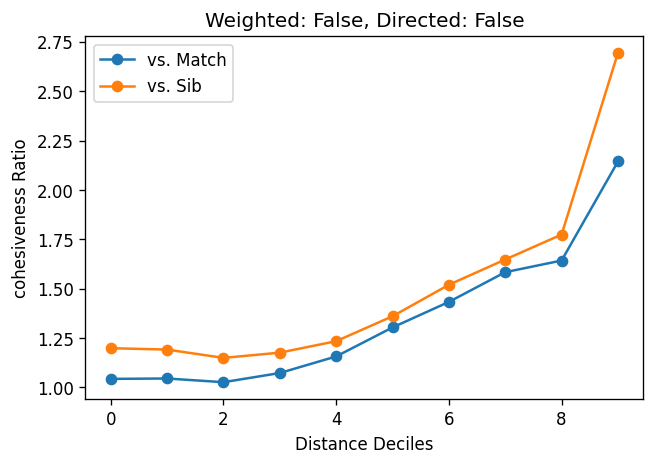

In [60]:
plt.figure(dpi=120)
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Match_Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Match")

res = []
for x,y in zip(Cartesian_asd_scores_deciles, Sib_Cartesian_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Sib")

plt.xlabel("Distance Deciles")
plt.ylabel("cohesiveness Ratio")
plt.title("Weighted: {}, Directed: {}".format(weighted, directed))
plt.legend()
plt.show()

##### 4.1.2 Binary, Directed

In [238]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.d.csv"
weighted = False; directed = True
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [239]:
Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Cartesian_match_scores_deciles.append(avg)

[1.0648053681507526, 1.0878552826716301, 1.0408210511973568, 1.110845911308285, 1.1919726060652784, 1.3781035390592027, 1.5484345845432763, 1.6254848897463967, 1.8139599179983745, 2.4202227299486436]


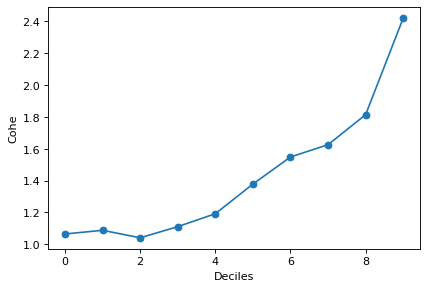

In [240]:
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

##### 4.1.3 Weighted

In [241]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.w.csv"
weighted = True; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [242]:
Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Cartesian_match_scores_deciles.append(avg)

[1.0457289345533043, 1.0487581364540848, 1.0303076191317784, 1.077659095361208, 1.1649936052484444, 1.3100011514411873, 1.435688220471737, 1.5849252837104504, 1.6058737327589327, 2.243819492962053]


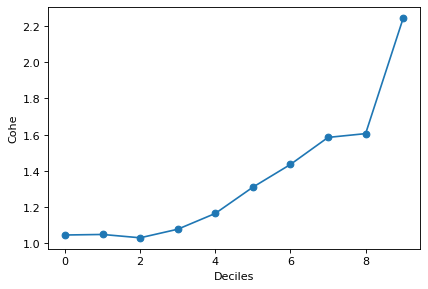

In [243]:
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

##### 4.1.4 Weighted, Directed

In [61]:
SA_wd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.wd.csv"
weighted = True; directed = True
Incircuit_wd = GetBestCoheSAFil(SA_wd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_wd, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [62]:
Match_Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Match_Cartesian_match_scores_deciles.append(avg)

In [63]:
Sib_Cartesian_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/sib.cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Sib_Cartesian_scores_deciles.append(avg)

In [64]:
print(Cartesian_asd_scores_deciles)
print(Match_Cartesian_match_scores_deciles)
print(Sib_Cartesian_scores_deciles)

[0.5355748265814344, 0.5053255916622086, 0.4611514012753308, 0.4631797324994653, 0.45971635884804946, 0.4954412014066943, 0.4808472438659043, 0.433247573200872, 0.38425128389902197, 0.33444723047475383]
[0.47327078162197267, 0.4463612194084443, 0.4302683273645054, 0.40936748143204804, 0.38318595699102664, 0.35922917744359695, 0.32539485496016834, 0.2861050250899575, 0.23984261335373566, 0.1570595601759581]
[0.422796023103852, 0.3992085547183776, 0.3889003889669614, 0.37626775048072997, 0.3662828791126562, 0.3495394028542153, 0.30769807640443264, 0.27121338864558625, 0.22215216769867407, 0.12250830662785148]


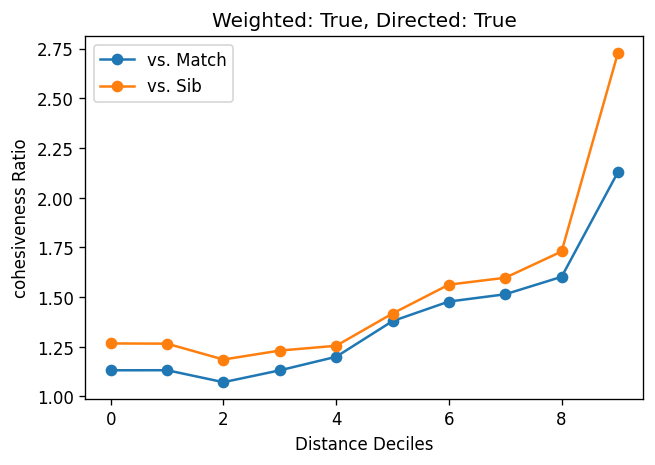

In [65]:
plt.figure(dpi=120)
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Match_Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Match")

res = []
for x,y in zip(Cartesian_asd_scores_deciles, Sib_Cartesian_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Sib")

plt.xlabel("Distance Deciles")
plt.ylabel("cohesiveness Ratio")
plt.title("Weighted: {}, Directed: {}".format(weighted, directed))
plt.legend()
plt.show()

In [364]:
Incircuit_wd = np.append(Incircuit_wd, ["Parafascicular_nucleus", "Caudoputamen"])

In [365]:
xx_cir = adj_mat.loc[Incircuit_wd, Incircuit_wd]

In [366]:
conn_str, conn_reg = queryDist(xx_cir, Cartesian_distances_w_edge, dist_min=5000, dist_max=1e6, directed=False)

In [367]:
conn_str

['Orbital_area_ventrolateral_part - Anteromedial_visual_area',
 'Orbital_area_ventrolateral_part - Posterior_parietal_association_areas',
 'Claustrum - Primary_visual_area',
 'Claustrum - Anteromedial_visual_area',
 'Claustrum - Retrosplenial_area_lateral_agranular_part',
 'Subiculum_dorsal_part - Infralimbic_area',
 'Subiculum_dorsal_part - Dorsal_peduncular_area',
 'Subiculum_dorsal_part - Nucleus_accumbens',
 'Subiculum_dorsal_part - Anterior_olfactory_nucleus',
 'Subiculum_dorsal_part - Taenia_tecta',
 'Anterior_cingulate_area_dorsal_part - Primary_visual_area',
 'Anterior_cingulate_area_dorsal_part - Lateral_visual_area',
 'Primary_visual_area - Anterior_cingulate_area_dorsal_part',
 'Anteromedial_visual_area - Orbital_area_ventrolateral_part',
 'Nucleus_of_reuniens - Anteromedial_visual_area',
 'Nucleus_of_reuniens - Retrosplenial_area_lateral_agranular_part',
 'Orbital_area_medial_part - Retrosplenial_area_lateral_agranular_part',
 'Secondary_motor_area - Primary_visual_area',
 

In [368]:
dat = []
for str_i in xx_cir.index.values:
    source = str_i
    source_region = str2reg[source]
    for str_j in xx_cir.index.values:
        target = str_j
        target_region = str2reg[target]
        if xx_cir.loc[str_i, str_j] != 0:
            weight = xx_cir.loc[str_i, str_j]
            dist_car = Cartesian_distances_w_edge.loc[str_i, str_j]
            dist_exp = Exp_distances_w_edge.loc[str_i, str_j]
            row = [source, target, source_region, target_region, weight, dist_car, dist_exp]
            dat.append(row)
df = pd.DataFrame(data=dat, columns=["source", "target", "source_region", "target_region", 
                                     "weight", "dist_car", "dist_exp"])

In [369]:
df.to_excel("dat/circuit_connections.xlsx")

### 4.2 Expression Distance

#### 4.2.0 PreProcessing

In [217]:
Exp_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                                   index_col="ROW")

In [219]:
def MaskDistMat(Mat1, Mat2, cutoff):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if Mat1.loc[STR_i, STR_j] <= cutoff:
                New_Mat2.loc[STR_i, STR_j] = 0
            else:
                New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2
Exp_distances_w_edge = MaskDistMat(adj_mat, Exp_distances, cutoff=0)

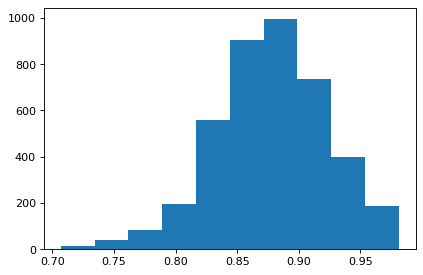

In [220]:
Exp_distances = [x for x in Exp_distances_w_edge.values.flatten() if x > 0]
Exp_distances_deciles = np.percentile(Exp_distances, np.arange(0, 100, 10))
plt.hist(Exp_distances)
plt.show()

In [412]:
[round(x, 3) for x in Exp_distances_deciles]

[0.707, 0.822, 0.842, 0.855, 0.867, 0.878, 0.889, 0.901, 0.916, 0.937]

In [247]:
def MaskDistMat_xx(distance_mat, Conn_mat, cutoff):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if distance_mat.loc[STR_i, STR_j] >= cutoff:
                Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
            else:
                Conn_mat_new.loc[STR_i, STR_j] = 0
                distance_mat_new.loc[STR_i, STR_j] = 0
    return Conn_mat_new, distance_mat_new
for i in range(10):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Exp_distances_w_edge, adj_mat, 
                                                cutoff=Exp_distances_deciles[i])
    print(Exp_distances_deciles[i])
    print(np.min(distance_mat_new.values), np.max(distance_mat_new.values))
    distance_mat_new.to_csv("../dat/allen-mouse-conn/expression_deciles_limit_{}.csv".format(i))

0.706725551476572
0.0 0.9811932732691958
0.821906784430336
0.0 0.9811932732691958
0.841677939892837
0.0 0.9811932732691958
0.8548013606040881
0.0 0.9811932732691958
0.8666756185160887
0.0 0.9811932732691958
0.8778422228476654
0.0 0.9811932732691958
0.8889308087581078
0.0 0.9811932732691958
0.9014664234747123
0.0 0.9811932732691958
0.9162022534931283
0.0 0.9811932732691958
0.9367338867879901
0.0 0.9811932732691958


In [248]:
graph_mats_expression = []
for i in range(10):
    xx = pd.read_csv("../dat/allen-mouse-conn/expression_deciles_limit_{}.csv".format(i), index_col=0)
    g_ = LoadConnectome2(xx)
    graph_mats_expression.append(g_)

#### 4.1.1 Unweighted, Undirected

[1.0430886924431364, 1.0443016818577602, 1.0910144715802914, 1.1140237532387256, 1.1176374614898124, 1.0718384828580259, 1.0862335497387607, 1.077289235070506, 1.0990777497880306, 1.1279490268792116]


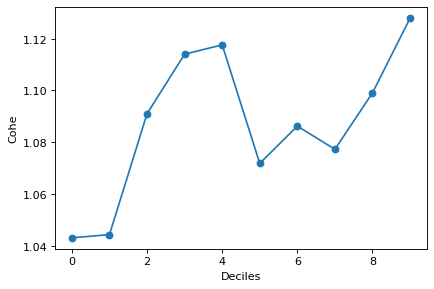

In [250]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
weighted = False; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

#### 4.1.2 Binary Directed

[1.0648053681507526, 1.0688021012707025, 1.1048333841061644, 1.079758075112067, 1.0821763325897762, 1.0694438634471353, 1.0647042103769475, 1.1153504622698545, 1.108028056500627, 1.174724319659951]


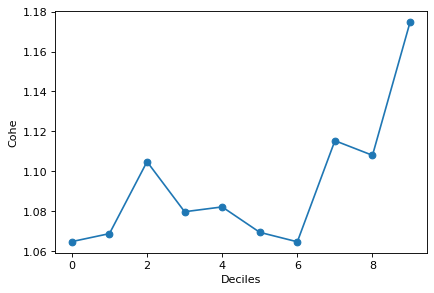

In [251]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.d.csv"
weighted = False; directed = True
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

#### 4.1.3 Weighted 

[1.0457289345533043, 1.0469797975428954, 1.0926136646147584, 1.1088659421764404, 1.1135785692846132, 1.0749846615448324, 1.0822820013688699, 1.0632670445388441, 1.0968930077815997, 1.147676876774687]


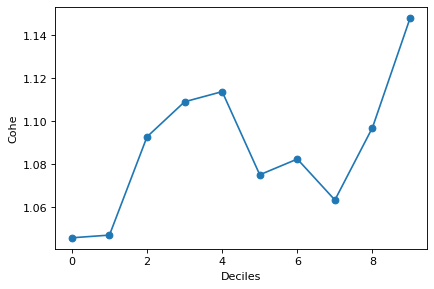

In [252]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.w.csv"
weighted = True; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

#### 4.1.4 Weighted Directed

[1.0666197191433084, 1.0723538120345568, 1.10651959885838, 1.0808482547138374, 1.0772449981585908, 1.0627345773971786, 1.0500340730115756, 1.0829401430672776, 1.0671493308755582, 1.1310648832984864]


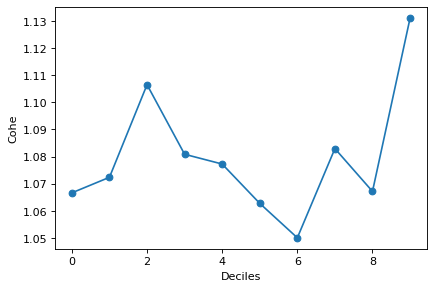

In [253]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.wd.csv"
weighted = True; directed = True
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.wd/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

In [254]:
0.380/0.364

1.043956043956044

In [255]:
0.536/0.496

1.0806451612903227

## 5. Complementary Sturctures

In [387]:
def complementarySturctures(adj_mat, graph, circuitsSTRs, WeightDict, weighted, directed):
    str2reg = STR2Region()
    All_STRs = adj_mat.index.values
    Out_Cir_STRs = [x for x in All_STRs if x not in circuitsSTRs]
    dat = []
    for _str in Out_Cir_STRs:
        tmp_strs = np.append(circuitsSTRs, _str)
        tmp_score = ScoreSTRSet(graph, tmp_strs, WeightDict, Weighted=weighted, Direction=directed)
        tmp_score = np.mean(tmp_score)
        region = str2reg[_str]
        dat.append([_str, region, tmp_score])
    return pd.DataFrame(data=dat, columns=["STR", "Region", "Cohesiveness"])

In [390]:
weighted, directed = False, False
SA_b = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
Incircuit_b = GetBestCoheSAFil(SA_b, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_b = complementarySturctures(adj_mat, g, Incircuit_b, EdgeWeightsDict, weighted, directed)
df_b = df_b.sort_values("Cohesiveness", ascending=False)

In [392]:
weighted, directed = False, True
SA_bd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.d.csv"
Incircuit_bd = GetBestCoheSAFil(SA_bd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_bd = complementarySturctures(adj_mat, g, Incircuit_bd, EdgeWeightsDict, weighted, directed)
df_bd = df_bd.sort_values("Cohesiveness", ascending=False)

In [393]:
weighted, directed = True, False
SA_w = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.w.csv"
Incircuit_w = GetBestCoheSAFil(SA_w, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_w = complementarySturctures(adj_mat, g, Incircuit_w, EdgeWeightsDict, weighted, directed)
df_w = df_w.sort_values("Cohesiveness", ascending=False)

In [394]:
weighted, directed = True, True
SA_wd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.wd.csv"
Incircuit_wd = GetBestCoheSAFil(SA_wd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_wd = complementarySturctures(adj_mat, g, Incircuit_wd, EdgeWeightsDict, weighted, directed)
df_wd = df_wd.sort_values("Cohesiveness", ascending=False)

In [397]:
writer = pd.ExcelWriter('complementary.xlsx', engine='xlsxwriter')
df_b.to_excel(writer, sheet_name='Binary', index=False)
df_bd.to_excel(writer, sheet_name='Binary Directed', index=False)
df_w.to_excel(writer, sheet_name='Weighted', index=False)
df_wd.to_excel(writer, sheet_name='Weighted Directed', index=False)
writer.save()

In [419]:
Incircuit_wd

array(['Dentate_gyrus', 'Prelimbic_area', 'Orbital_area_lateral_part',
       'Field_CA1', 'Infralimbic_area', 'Dorsal_peduncular_area',
       'Nucleus_accumbens', 'Field_CA2',
       'Lateral_posterior_nucleus_of_the_thalamus',
       'Orbital_area_ventrolateral_part', 'Claustrum', 'Field_CA3',
       'Anterior_olfactory_nucleus', 'Endopiriform_nucleus_dorsal_part',
       'Subiculum_dorsal_part', 'Anterior_cingulate_area_dorsal_part',
       'Primary_visual_area', 'Anteromedial_visual_area',
       'Nucleus_of_reuniens', 'Accessory_olfactory_bulb',
       'Retrosplenial_area_lateral_agranular_part',
       'Orbital_area_medial_part', 'Secondary_motor_area',
       'Anterior_cingulate_area_ventral_part', 'Presubiculum',
       'Agranular_insular_area_ventral_part',
       'Mediodorsal_nucleus_of_thalamus',
       'Lateral_septal_nucleus_caudal_caudodorsal_part',
       'Basolateral_amygdalar_nucleus',
       'Submedial_nucleus_of_the_thalamus',
       'Primary_somatosensory_area_trun

In [437]:
def complementarySturctures2(adj_mat, graph, circuitsSTRs, WeightDict, weighted, directed):
    str2reg = STR2Region()
    All_STRs = adj_mat.index.values
    SetcircuitsSTRs = set(circuitsSTRs)
    Out_Cir_STRs = [x for x in All_STRs if x not in SetcircuitsSTRs]
    dat = []
    for _str in Out_Cir_STRs:
        reg = str2reg[_str]
        conn_to_cir_in, conn_to_all_in = [], []
        conn_to_cir_out, conn_to_all_out = [],[]

        for _str_j in adj_mat.columns.values:
            conn_to_all_out.append(adj_mat.loc[_str, _str_j])
            if _str_j in SetcircuitsSTRs:
                conn_to_cir_out.append(adj_mat.loc[_str, _str_j])
                #if _str == "Retrosplenial_area_dorsal_part" and adj_mat.loc[_str, _str_j]!=0:
                if _str == "Retrosplenial_area_dorsal_part" :
                    print(_str_j, adj_mat.loc[_str, _str_j])
                
        for _str_i in adj_mat.index.values:
            conn_to_all_in.append(adj_mat.loc[_str_i, _str])
            if _str_i in SetcircuitsSTRs:
                conn_to_cir_in.append(adj_mat.loc[_str_i, _str])
                #if _str == "Retrosplenial_area_dorsal_part":
                #    print(_str_i)
                
        conn_to_cir = conn_to_cir_in + conn_to_cir_out
        conn_to_all = conn_to_all_in + conn_to_all_out
        ratio_all = np.sum(conn_to_cir)/np.sum(conn_to_all)
        ratio_inc = np.sum(conn_to_cir_in)/np.sum(conn_to_all_in)
        ratio_out = np.sum(conn_to_cir_out)/np.sum(conn_to_all_out)
        dat.append([_str, reg, ratio_all, ratio_out, ratio_inc])
    return pd.DataFrame(data=dat, columns=["STR", "Region", "Ratio_total", "Ratio_outgoing", "Ratio_incoming"])

In [438]:
df_xx = complementarySturctures2(adj_mat, g, Incircuit_wd, EdgeWeightsDict, weighted, directed)

Anterior_cingulate_area_dorsal_part 0.0
Anterior_cingulate_area_ventral_part 0.0
Nucleus_accumbens 0.0
Agranular_insular_area_ventral_part 0.0
Accessory_olfactory_bulb 0.0
Anterior_olfactory_nucleus 0.0
Basolateral_amygdalar_nucleus 0.0
Field_CA1 0.0
Field_CA2 0.0
Field_CA3 0.0
Claustrum 0.0
Dentate_gyrus 0.0
Dorsal_peduncular_area 0.0
Endopiriform_nucleus_dorsal_part 0.0
Infralimbic_area 0.0
Lateral_posterior_nucleus_of_the_thalamus 0.0
Lateral_septal_nucleus_caudal_caudodorsal_part 0.0
Mediodorsal_nucleus_of_thalamus 0.0
Secondary_motor_area 0.0
Orbital_area_lateral_part 0.0
Orbital_area_medial_part 0.0
Orbital_area_ventrolateral_part 0.0
Prelimbic_area 0.0
Presubiculum 0.0
Posterior_parietal_association_areas 0.0
Nucleus_of_reuniens 0.0
Retrosplenial_area_lateral_agranular_part 0.0
Submedial_nucleus_of_the_thalamus 0.0
Primary_somatosensory_area_trunk 0.0
Subiculum_dorsal_part 0.0
Taenia_tecta 0.0
Anteromedial_visual_area 0.0
Lateral_visual_area 0.0
Primary_visual_area 0.0


In [411]:
df_xx.to_excel("test.xlsx", index=False)